# Coursera Courses
[Kaggle Dataset link](https://www.kaggle.com/datasets/siddharthm1698/coursera-course-dataset)

The dataset contains 891 courses' information, scraped from Coursera's website; It features the following columns:
* **course_title** : Contains the course title.
* **course_organization** : It tells which organization is conducting the courses.
* **course_certificate_type** : It has details about what are the different certifications available in courses.
* **course_rating** : It has the ratings associated with each course.
* **course_difficulty** : It tells about how difficult or what is the level of the course.
* **course_students_enrolled** : It has the number of students that are enrolled in the course.

# Introduction

## Context
In this analysis, we'll assume the role of specialists at a new EdTech firm. Our task involves exploring datasets within the realm of online courses, often known as MOOCs, to identify the key components of a well-received and popular course. This information will assist our firm in selecting the next organization to collaborate with in developing an online course. To begin, we've chosen to utilize the [Coursera Course Dataset](https://www.kaggle.com/datasets/siddharthm1698/coursera-course-dataset) available on Kaggle.

## The Questions
Upon reviewing the dataset columns' descriptions, we've identified several questions to explore through data analysis:
1. What are the prominent organizations within Coursera? Are they businesses or educational institutions?
2. Which types of certificates are most in demand among learners?
3. How does course enrollment vary concerning difficulty levels?
4. Is there a significant difference in course ratings across various offerings?

With these questions in mind, let's set up the Notebook and prepare the dataset.

# Data Preparation

## Imports & Configuration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
from utils import convert_factor, map_category, detailed_labels

In [2]:
warnings.filterwarnings('ignore')

In [3]:
color_palette = sns.color_palette("colorblind")
sns.set_style("whitegrid", {'axes.grid' : False})

In [4]:
df_courses = pd.read_csv('./data/coursera_data.csv', index_col=0)
df_courses.index.name = 'course_id'
df_courses = df_courses.reset_index()
df_courses.head()

,course_id,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [5]:
rows, columns = df_courses.shape
print(f"The dataset contains {rows} courses and {columns} columns.")

The dataset contains 891 courses and 7 columns.


## Data Formatting

### Renaming Columns
For sake of clarity, let's rename the columns.

In [6]:
df_courses.columns = df_courses.columns.str.replace('_', ' ').str.title()

In [7]:
df_courses.dtypes

Course Id                     int64
Course Title                 object
Course Organization          object
Course Certificate Type      object
Course Rating               float64
Course Difficulty            object
Course Students Enrolled     object
dtype: object

The 'Course Students Enrolled' is not recognized as a numeric column. Let's create a column **Course Students Enrolled TH** and display the enrollment counts in thousands.

In [8]:
df_courses['Course Students Enrolled TH'] = df_courses['Course Students Enrolled'].apply(convert_factor) / 1000
df_courses[['Course Title', 'Course Students Enrolled TH']].sort_values(by='Course Students Enrolled TH', ascending=False).head()

,Course Title,Course Students Enrolled TH
564,Machine Learning,3200.0
815,The Science of Well-Being,2500.0
688,Python for Everybody,1500.0
674,Programming for Everybody (Getting Started wit...,1300.0
196,Data Science,830.0


<h2>Data Cleaning</h2>

<h3>Missing Values</h3>

In [9]:
df_courses.isna().sum()

Course Id                      0
Course Title                   0
Course Organization            0
Course Certificate Type        0
Course Rating                  0
Course Difficulty              0
Course Students Enrolled       0
Course Students Enrolled TH    0
dtype: int64

<h3>Duplicate Rows</h3>

In [10]:
print(f"The dataset contains {rows} courses, {df_courses['Course Id'].nunique()} of which are unique.")

The dataset contains 891 courses, 891 of which are unique.


No missing values and no duplicate rows! We can proceed to **Data Analysis**.

# Data Analysis

## Exploration

Before getting into in-depth analysis and visualization, let's have a look at the contents of some categorical variables and the trends within the numerical variables.

In [11]:
certificate_counts = df_courses.groupby('Course Certificate Type')['Course Id'].count().sort_values(ascending=False)
print("The dataset features the following certifications:")
for cert, cert_count in certificate_counts.items():
    print(f"{cert} - {cert_count} ({cert_count / rows:.0%}) courses")

The dataset features the following certifications:
COURSE - 582 (65%) courses
SPECIALIZATION - 297 (33%) courses
PROFESSIONAL CERTIFICATE - 12 (1%) courses


In [12]:
difficulties_counts = df_courses.groupby('Course Difficulty')['Course Id'].count().sort_values(ascending=False)
print("The courses are categorized in the following difficulties:")
for diff, diff_count in difficulties_counts.items():
    print(f"{diff} - {diff_count} ({diff_count / rows:.0%}) courses")

The courses are categorized in the following difficulties:
Beginner - 487 (55%) courses
Intermediate - 198 (22%) courses
Mixed - 187 (21%) courses
Advanced - 19 (2%) courses


In [13]:
course_orgs = df_courses['Course Organization'].unique()
print(f"The dataset features courses from {len(course_orgs)} organizations.")

The dataset features courses from 154 organizations.


In [14]:
df_courses[['Course Rating', 'Course Students Enrolled TH']].describe()

,Course Rating,Course Students Enrolled TH
count,891.000000,891.000000
mean,4.677329,90.552076
std,0.162225,181.936454
min,3.300000,1.500000
25%,4.600000,17.500000
50%,4.700000,42.000000
75%,4.800000,99.500000
max,5.000000,3200.000000


The initial data exploration has given us the following information:

Categorical Variables:
1. Certifications are categorized as *SPECIALIZATION*, *PROFESSIONAL CERTIFICATE* and *COURSE*, where the latter makes up almost two-thirds of the courses;
2. More than half of the courses are categorized as *Beginner*; On the other hand, *Advanced* courses make up only 2% of the dataset's courses;
3. A total of **154** institutions have listed their courses when the data was collected.

Numeric Variables:
1. The mean course rating is high at **4.68**; The 25th percentile is very high as well, with a rating of **4.60**.
2. The course enrollment variance is large at **181.94k** learners.

## Course Organizations

Our first step is to identify the course providers by their respective categories. Regrettably, the dataset solely offers the organization name. Yet, upon a brief review of the Course Organization column, it appears that the majority of educational institutions tend to include the keyword *university* (or its foreign language equivalent) for universities and *school* for private schools. To add more variety, we'll categorize each organization accordingly: Entities containing the aforementioned keywords will be categorized as *Higher Education*, while the remaining entries will fall under *Other*.

In [15]:
keywords = {
    'university': 'Higher Education',
    'school': 'Higher Education',
}
df_courses['Organization Category'] = df_courses.apply(lambda row: map_category(row['Course Organization'], keywords), axis=1)
df_courses[['Course Organization', 'Organization Category']].head(10)

,Course Organization,Organization Category
0,(ISC)²,Other
1,University of Pennsylvania,Higher Education
2,Johns Hopkins University,Higher Education
3,Yale University,Higher Education
4,Indian School of Business,Higher Education
5,University at Buffalo,Higher Education
6,deeplearning.ai,Other
7,deeplearning.ai,Other
8,IBM,Other
9,deeplearning.ai,Other


Let's also create DataFrame for the top 10 courses; It might prove useful to get a quick view of the most popular courses.

In [16]:
top_10_courses = df_courses.sort_values(by=['Course Students Enrolled TH'], ascending=False)[:10]

### Course Frequency by Organization Category
First, let's take a look at the amount of released courses by educational insitutions and other organizations.

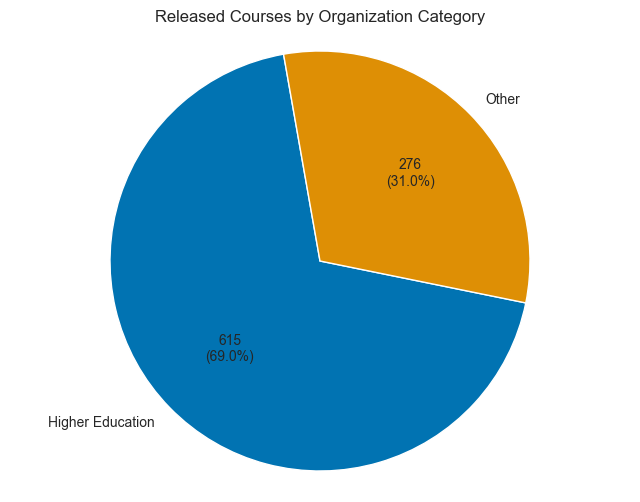

In [17]:
org_category_counts = df_courses['Organization Category'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(org_category_counts, labels=org_category_counts.index, autopct=lambda pct: detailed_labels(pct, org_category_counts),
        startangle=100, colors=color_palette)
plt.title('Released Courses by Organization Category')
plt.axis('equal')
plt.show();

Higher education institutions published more than two-thirds of the courses listed in the dataset. Let's check the top 10 publishers.

### Organizations with most published courses

In [18]:
top_10_orgs = df_courses.groupby(['Course Organization', 'Organization Category'])['Course Id'].count().sort_values(ascending=False)[:10]
top_10_orgs = top_10_orgs.reset_index(level=1)

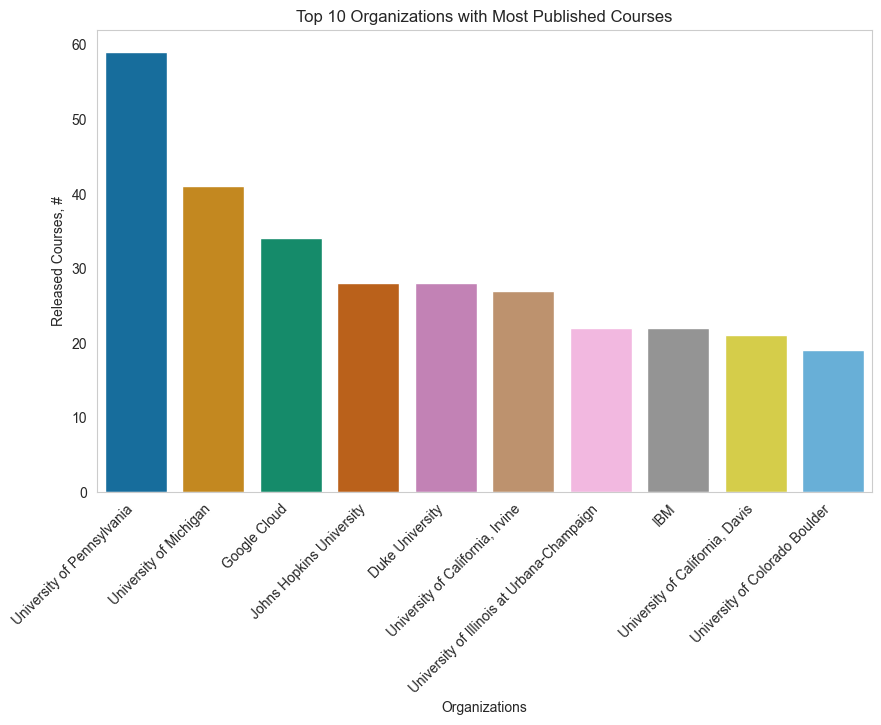

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_orgs.index, y=top_10_orgs['Course Id'], palette=color_palette)
plt.xlabel('Organizations')
plt.ylabel('Released Courses, #')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Organizations with Most Published Courses');

Also, let's chart the top 10 courses and color them based on which organization released them.

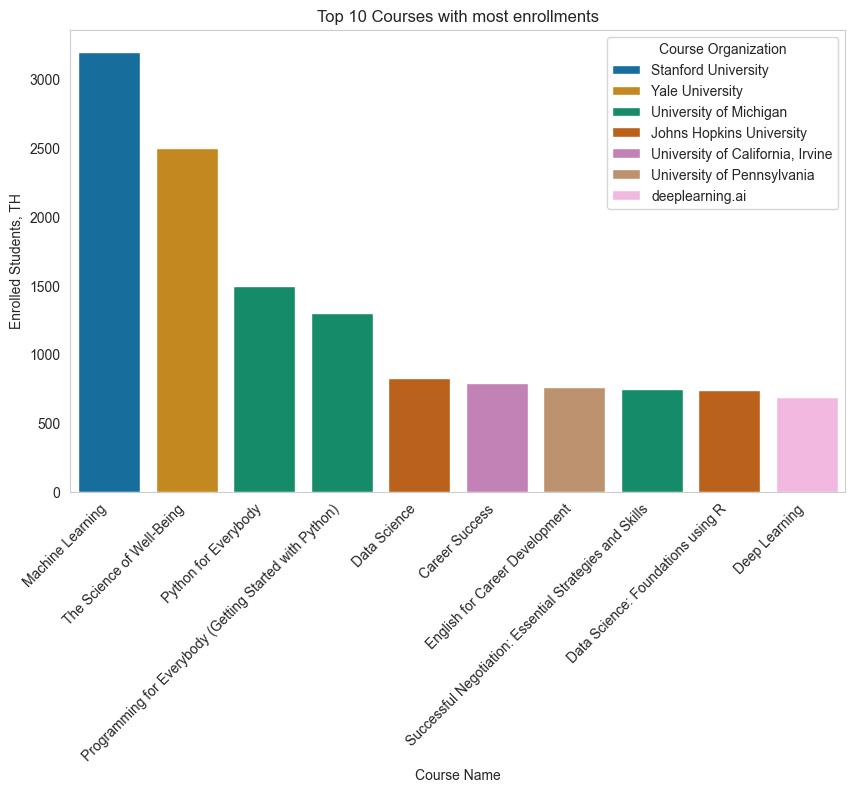

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_courses, x='Course Title', y='Course Students Enrolled TH',
            hue='Course Organization', dodge=False, palette=color_palette)
plt.xlabel('Course Name')
plt.ylabel('Enrolled Students, TH')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Courses with most enrollments')
plt.legend(title='Course Organization', loc=1);

An very valuable finding - the majority of the organizations featured in the chart are **universities**! Furthermore, university-created courses dominate the Top 10 in terms of course enrollment. Let's summarize the findings.

In [21]:
edu_orgs = df_courses[df_courses['Organization Category'] == 'Higher Education']['Course Organization']
top10_orgs_edu_count = top_10_orgs[top_10_orgs['Organization Category'] == 'Higher Education']['Organization Category'].count()
top10_courses_edu_count = top_10_courses[top_10_courses['Organization Category'] == 'Higher Education']['Organization Category'].count()
edu_count = edu_orgs.nunique()
print(f"{org_category_counts['Higher Education']} out of {rows} courses are made by higher education institutions.")
print(f"{edu_count} of {len(course_orgs)} course providing organizations are higher education institutions.")
print(f"{top10_orgs_edu_count} out of 10 largest course providers in the dataset are higher education institutions.")
print(f"{top10_courses_edu_count} out of 10 biggest courses in the dataset are made by higher education institutions.")

615 out of 891 courses are made by higher education institutions.
90 of 154 course providing organizations are higher education institutions.
8 out of 10 largest course providers in the dataset are higher education institutions.
9 out of 10 biggest courses in the dataset are made by higher education institutions.


**QUESTION**: What are the prominent organizations within Coursera? Are they businesses or educational institutions?

**ANSWER**: Based on the dataset contents, the most prominent organizations within the Coursera platform are **higher education institutions**, in terms of both **course releases** and **course enrollment**.

## Course Certifications
A big part of the learning process is proof of knowledge. Besides a project portfolio, a good indicator of education efforts are certifications. Let's review how enrollment varies between the various certification programs.

First, let's create perform aggregations based on certificate type to support visual analysis.

In [22]:
certificate_summary = df_courses.groupby('Course Certificate Type').agg(
        Count=('Course Certificate Type', 'count'),
        TotalEnrollment=('Course Students Enrolled TH', 'sum'),
        Mean=('Course Students Enrolled TH', 'mean'),
        Percentile25=('Course Students Enrolled TH', lambda x: x.quantile(0.25)),
        Percentile75=('Course Students Enrolled TH', lambda x: x.quantile(0.75))
).reset_index()
certificate_summary['Interquartile Range'] = certificate_summary['Percentile75'] - certificate_summary['Percentile25']
certificate_summary

,Course Certificate Type,Count,TotalEnrollment,Mean,Percentile25,Percentile75,Interquartile Range
0,COURSE,582,51131.3,87.854467,19.00,91.0,72.00
1,PROFESSIONAL CERTIFICATE,12,2288.4,190.700000,80.75,320.0,239.25
2,SPECIALIZATION,297,27262.2,91.791919,14.00,100.0,86.00


### Course Frequency by Certificate Type

Let's review the courses' split by provided certification type.

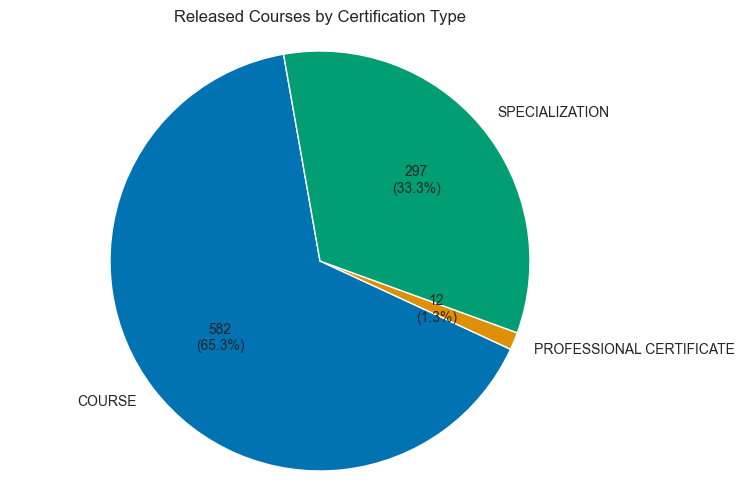

In [23]:
plt.figure(figsize=(8, 6))
plt.pie(certificate_summary['Count'], labels=certificate_summary['Course Certificate Type'],
        autopct=lambda pct: detailed_labels(pct, certificate_summary['Count']),
        startangle=100, colors=color_palette)
plt.title('Released Courses by Certification Type')
plt.axis('equal');

Almost two-thirds of the courses provide the *Course* certification, while a third provides the *Specialization* certificate. *Professional Certificate* courses seem to be very few in numbers.

### Enrollment Distribution by Certificate Type

Let's shift the focus to enrollment - first, by checking the Top 10 courses based on enrollment to see which certificate type is the most prominent among the most popular courses.

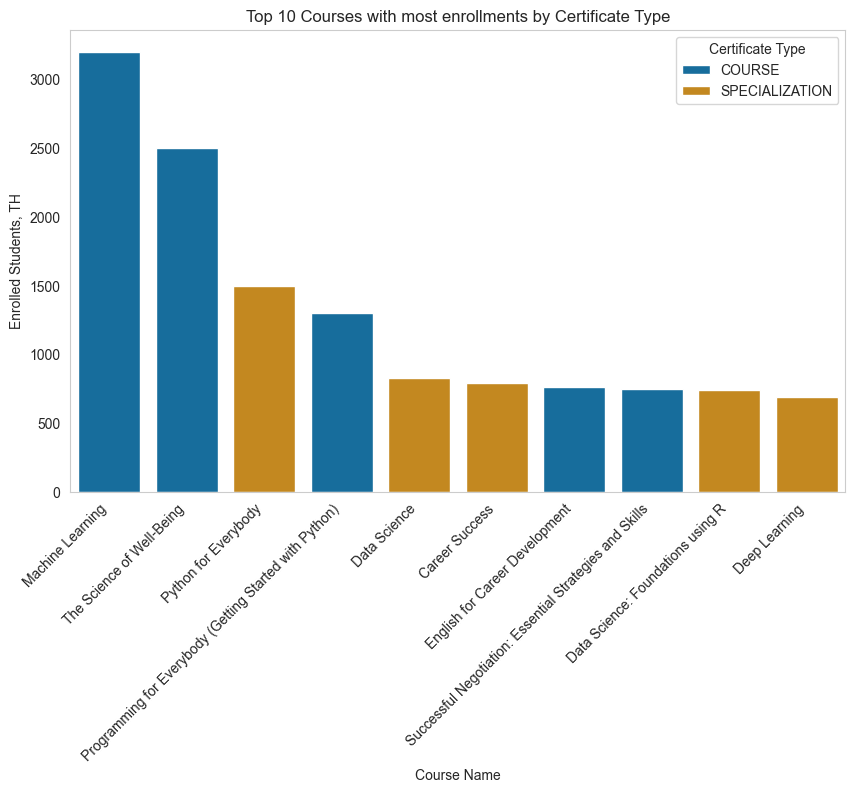

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_courses, x='Course Title', y='Course Students Enrolled TH',
            hue='Course Certificate Type', dodge=False, palette=color_palette)
plt.xlabel('Course Name')
plt.ylabel('Enrolled Students, TH')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Courses with most enrollments by Certificate Type')
plt.legend(title='Certificate Type', loc=1);

*Course* and *Specialization* certificate courses have an equal distribution in the Top 10. However, the two most popular courses, with more than 2 million enrollments, provide the *Course* certificate.

Let's review the enrollment distribution by the certificate type. To make the chart more readable, let's limit the enrollment numbers to **1 million**, excluding the top four courses to have better visibility of the majority data points.

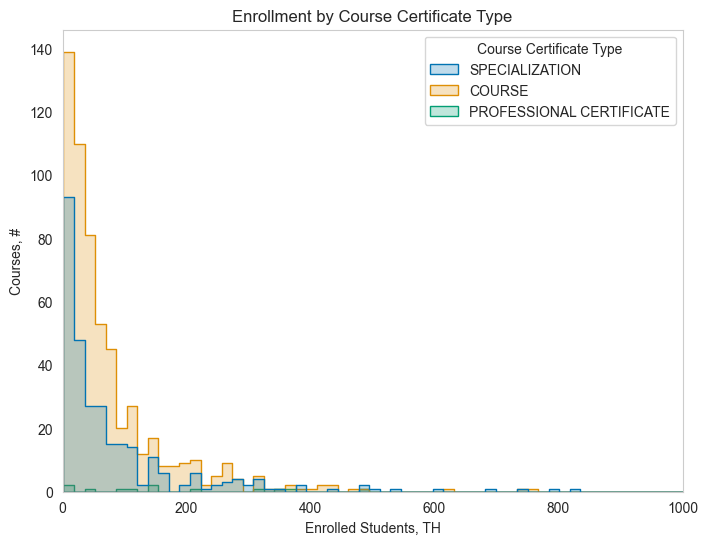

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_courses, x='Course Students Enrolled TH', hue='Course Certificate Type',
             element='step', palette=sns.color_palette('colorblind', n_colors=3))
plt.xlim(0, 1000)
plt.xlabel('Enrolled Students, TH')
plt.ylabel('Courses, #')
plt.title('Enrollment by Course Certificate Type');

*Course* and *Professional Certificate* courses seem to follow a similar pattern - only a handful of courses exceed the 200k enrollment counts. It is difficult to draw the same conclusion for the *Professional Certificate* courses, therefore, let's compare the means.

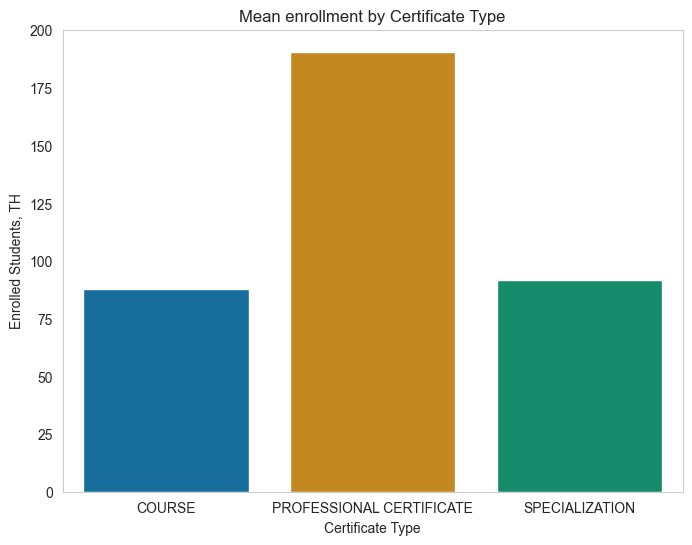

In [26]:
plt.figure(figsize=(8, 6))
sns.barplot(data=certificate_summary, x='Course Certificate Type', y='Mean',palette=color_palette)
plt.xlabel('Certificate Type')
plt.ylabel('Enrolled Students, TH')
plt.title('Mean enrollment by Certificate Type');

A very interesting finding! Although very few in numbers, *Professional Certificate* courses seem to have a double average enrollment! This certificate category might be an untapped market. However, let's also check the interquartile range.

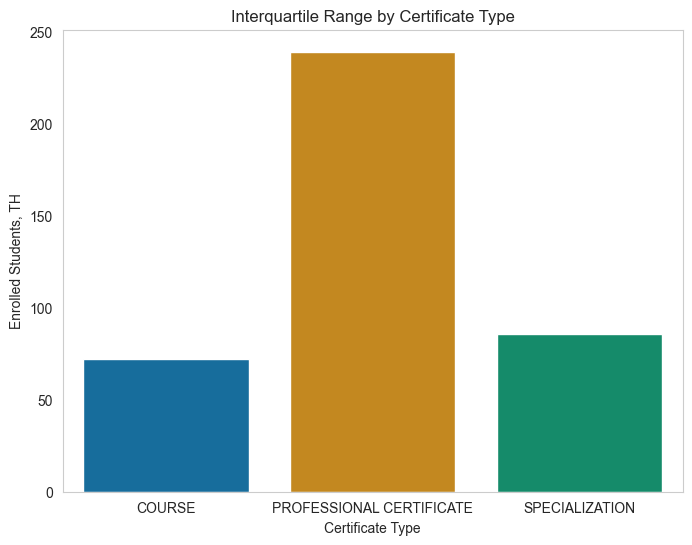

In [27]:
plt.figure(figsize=(8, 6))
sns.barplot(data=certificate_summary, x='Course Certificate Type', y='Interquartile Range', palette=color_palette)
plt.xlabel('Certificate Type')
plt.ylabel('Enrolled Students, TH')
plt.title('Interquartile Range by Certificate Type');

After eliminating the few large courses and the many smaller ones, we see an even larger gap between *Professional Certificates* and the rest! A course providing this sort of certification might be a solid choice for our course blueprint! To finalize this section of the analysis, let's quickly view the organizations that created the *Professional Certificate* courses.

In [28]:
professional_cert_courses = df_courses[df_courses['Course Certificate Type']=='PROFESSIONAL CERTIFICATE']
professional_cert_courses = professional_cert_courses.sort_values(by=['Course Students Enrolled TH'], ascending=False)

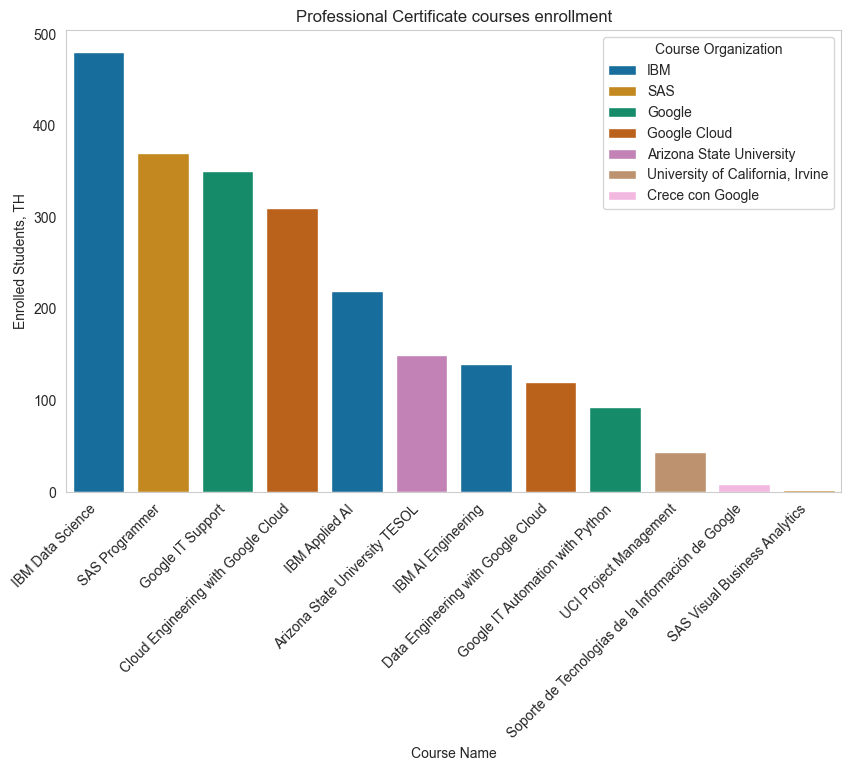

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(data=professional_cert_courses, x='Course Title', y='Course Students Enrolled TH',
            hue='Course Organization', palette=color_palette, dodge=False)
plt.xlabel('Course Name')
plt.ylabel('Enrolled Students, TH')
plt.title('Professional Certificate courses enrollment')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Course Organization', loc=1);

As previously noted, the majority of *Professional Certificate* offerings have a solid enrollment rate. An important detail to note is that in this dataset, only one university has a *Professional Certificate* course; The rest are businesses. This outcome makes sense - professional certificates teach very specific job skills, therefore they are mostly business-driven. Before drawing conclusions whether a university or a business client makes sense to our EdTech endeavors, we must also consider the following points outside of this analysis:
* How do course completion rates differ between the various certificate types?
* How do course preparation costs differ between business and university clients?

**QUESTION**: Which types of certificates are most in demand among learners?

**ANSWER**: **Professional Certificate** courses have the largest average enrolled student counts, although they are few in number and **mostly published by businesses**. **Course** and **Specialization** certificate courses are much more frequent and occupy the 10 most popular courses in the platform; However, the average course of this certification does not exceed 100k learners.

## Course Difficulty
Each course has a difficulty category assigned to it. The category might be subjective and is not comparable between different fields of study; Nontheless, let's explore the trends behind this variable and see whether there are any trends in terms of enrollment.

First, let's perform some aggregations.

In [30]:
difficulty_summary = df_courses.groupby('Course Difficulty').agg(
        Count=('Course Difficulty', 'count'),
        TotalEnrollment=('Course Students Enrolled TH', 'sum'),
        Mean=('Course Students Enrolled TH', 'mean'),
        Percentile25=('Course Students Enrolled TH', lambda x: x.quantile(0.25)),
        Percentile75=('Course Students Enrolled TH', lambda x: x.quantile(0.75))
).reset_index()
difficulty_summary['Interquartile Range'] = difficulty_summary['Percentile75'] - difficulty_summary['Percentile25']
difficulty_summary

,Course Difficulty,Count,TotalEnrollment,Mean,Percentile25,Percentile75,Interquartile Range
0,Advanced,19,1264.4,66.547368,14.0,64.00,50.00
1,Beginner,487,39921.8,81.974949,15.0,98.50,83.50
2,Intermediate,198,14506.3,73.264141,14.0,79.75,65.75
3,Mixed,187,24989.4,133.633155,35.0,120.00,85.00


### Course Frequency by course difficulty

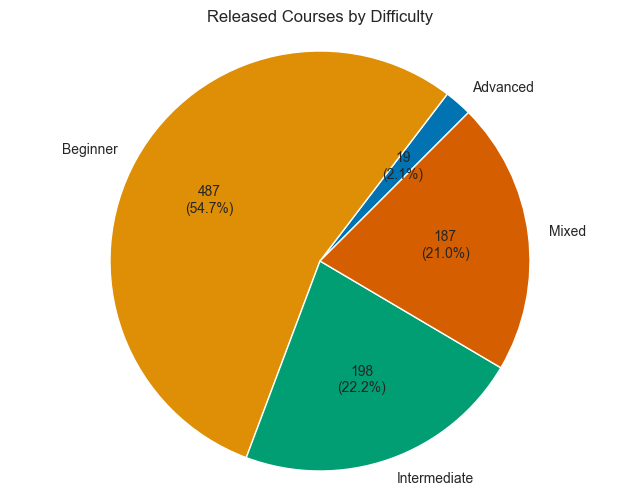

In [31]:
plt.figure(figsize=(8, 6))
plt.pie(difficulty_summary['Count'], labels=difficulty_summary['Course Difficulty'],
        autopct=lambda pct: detailed_labels(pct, difficulty_summary['Count']),
        startangle=45, colors=color_palette)
plt.title('Released Courses by Difficulty')
plt.axis('equal');

More than half of the courses are classified as *Beginner*, followed by *Intermediate* and *Mixed* taking up a fifth of the total courses count. *Advanced* make up only 2% of the total course offerings.

### Enrollment Distribution by Course Difficulty

As with course certification, let's first check the top 10 to get the general idea of the most popular courses by difficulty.

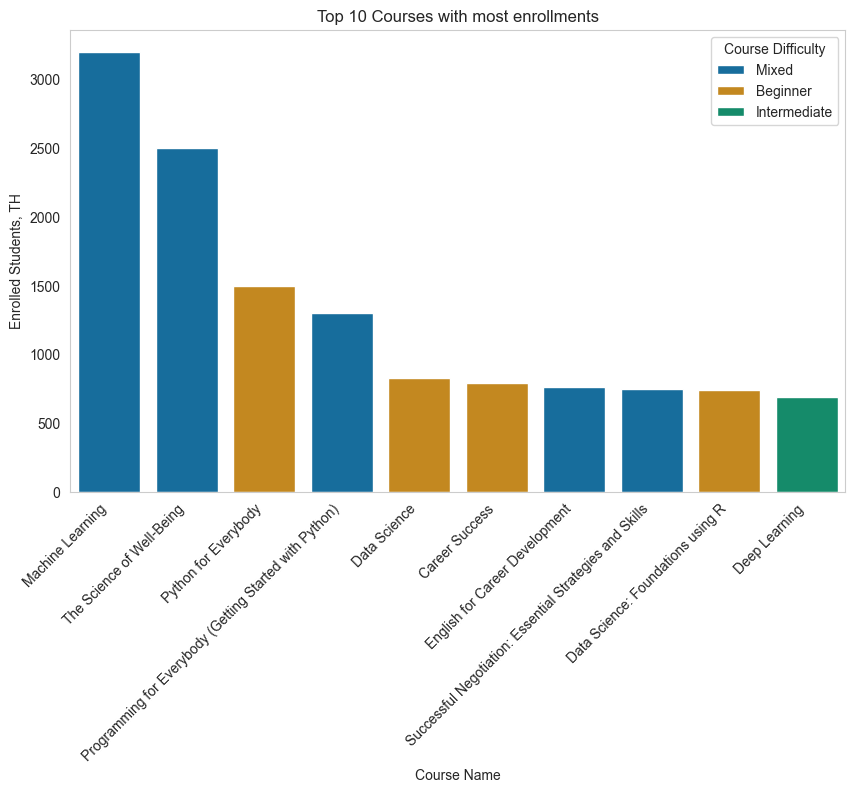

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_courses, x='Course Title', y='Course Students Enrolled TH',
            hue='Course Difficulty', dodge=False, palette=color_palette)
plt.xlabel('Course Name')
plt.ylabel('Enrolled Students, TH')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Courses with most enrollments');

*Mixed* difficulty courses take the Top 2 spots. Besides that, the rest of the Top 10 is mostly shared by *Beginner* and *Mixed* courses. Let's review the enrollment distributions in the range of **up to 1 million enrollments**.

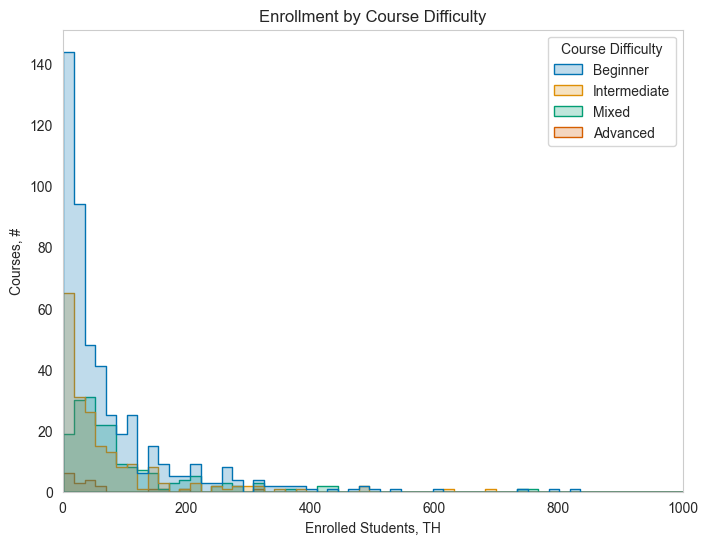

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_courses, x='Course Students Enrolled TH', hue='Course Difficulty',
             element='step', palette=sns.color_palette('colorblind', n_colors=4))
plt.xlim(0, 1000)
plt.xlabel('Enrolled Students, TH')
plt.ylabel('Courses, #')
plt.title('Enrollment by Course Difficulty');

An interesting find from this visual is that *intermediate* courses have a much lower distribution in the left-most part of the histogram. Let's review the **mean** and **interquartile range** to see for any differences.

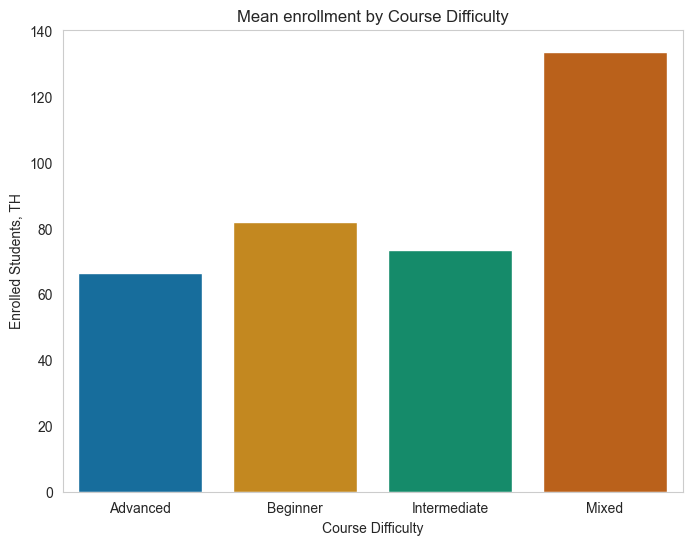

In [34]:
plt.figure(figsize=(8, 6))
sns.barplot(data=difficulty_summary, x='Course Difficulty', y='Mean',palette=color_palette)
plt.xlabel('Course Difficulty')
plt.ylabel('Enrolled Students, TH')
plt.title('Mean enrollment by Course Difficulty');

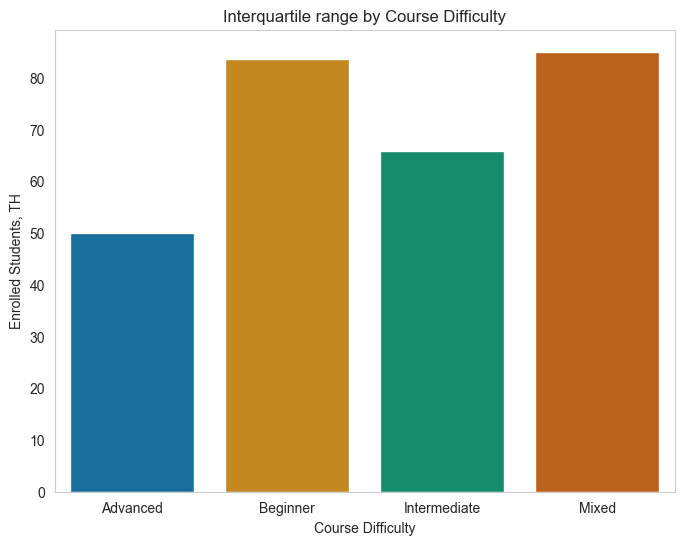

In [35]:
plt.figure(figsize=(8, 6))
sns.barplot(data=difficulty_summary, x='Course Difficulty', y='Interquartile Range', palette=color_palette)
plt.xlabel('Course Difficulty')
plt.ylabel('Enrolled Students, TH')
plt.title('Interquartile range by Course Difficulty');

By eliminating the low-end and high-end quartile values, we get a distribution that displays the largest average enrollment rates for *Beginner* and *Mixed* courses. The findings relate nicely to the Top 10 courses - the majority are *Beginner* or *Mixed* courses as well. An important point to mention is that the ***Mixed* difficulty courses have a higher mean**, largely driven by the larger 25th Percentile value compared to other difficulty categories.

**QUESTION**: How does course enrollment vary concerning difficulty levels?

**ANSWER**: **Mixed** and **Beginner** difficulty courses have the largest average enrolled student counts and make up the majority of the Top 10 most popular courses within the dataset. **Mixed** courses have a larger mean enrolled student count, mostly driven by the larger 25th Percentile value.

## Course Rating
Let's finalize the analysis with an overview of course ratings. Based on the [Help Article on Coursera](https://www.coursera.support/s/article/208280066-Rate-a-course-or-course-materials?language=en_US), a learner can rate a course or course material at any time during enrollment. This prevents us from seeing the "full picture", i.e., to compare the course ratings when they are rated **after** completion, as the learner can rate it at any point of the course. However, let's proceed with the analysis and see what we can derive from the ratings.

For most visuals under this section, we will be using the boxplots, as they provide the most optimal combination of information. The white circles inside the interquartile range will display the mean.

### Rating by Certificate Type

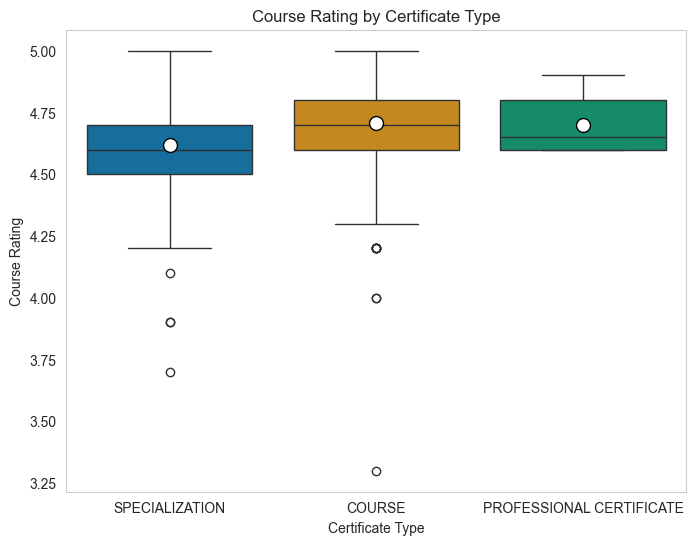

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_courses, x='Course Certificate Type', y='Course Rating', palette=color_palette,
            showmeans=True,
            meanprops={"marker":"o",
            "markerfacecolor":"white", 
            "markeredgecolor":"black",
            "markersize":"10"})
plt.xlabel('Certificate Type')
plt.ylabel('Course Rating')
plt.title('Course Rating by Certificate Type');

*Course* and *Professional Certificate* courses have an almost identical rating interquartile range, although the *Professional Certificate* courses did not reach the maximum rating of 5. Regardless, the *Professional Certificate* courses have the least variation of the certificate categories.

### Rating by Course Difficulty

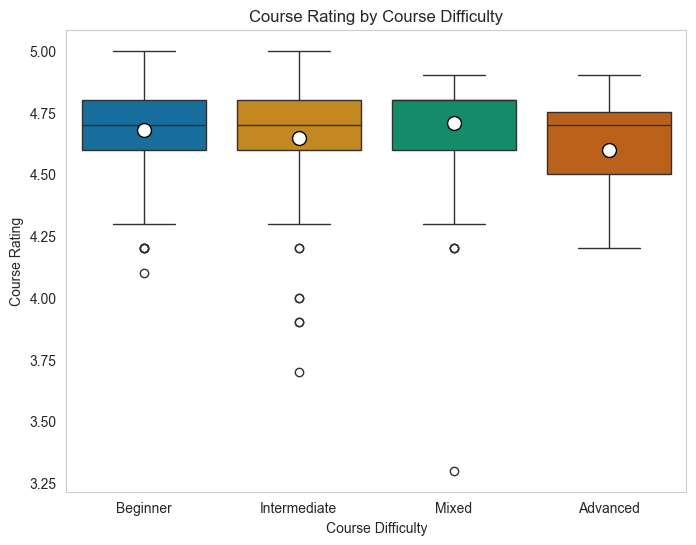

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_courses, x='Course Difficulty', y='Course Rating', palette=color_palette,
            showmeans=True,
            meanprops={"marker":"o",
            "markerfacecolor":"white", 
            "markeredgecolor":"black",
            "markersize":"10"})
plt.xlabel('Course Difficulty')
plt.ylabel('Course Rating')
plt.title('Course Rating by Course Difficulty');

*Mixed* difficulty courses have the highest mean and median, with the median matching the 75th quartile value at 4.8. Besides the two outliers, *Mixed* difficulty courses have the least variance between ratings, although they do not hit the 5.0 rating once.

Let's summarize the rating and certificate-difficulty analysis with a heatmap in hopes of finding a solid combination of the two.

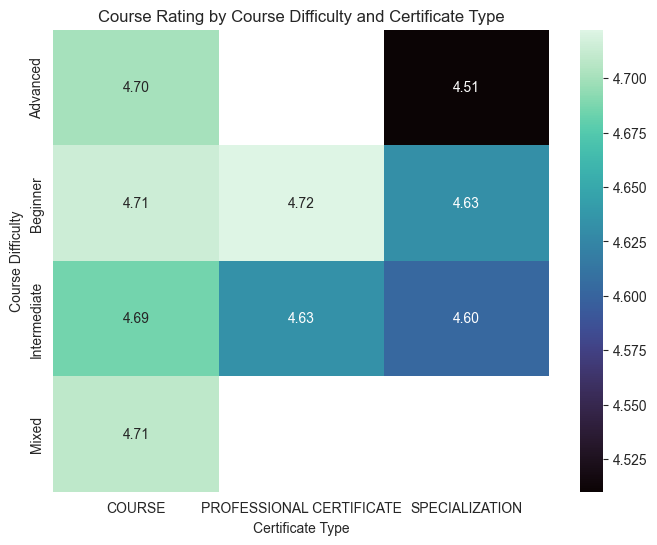

In [38]:
plt.figure(figsize=(8, 6))
pivot_courses = df_courses.pivot_table(values='Course Rating', index='Course Difficulty',
                                       columns='Course Certificate Type', aggfunc=np.mean)
sns.heatmap(data=pivot_courses, annot=True, cmap='mako', fmt='.2f')
plt.xlabel('Certificate Type')
plt.ylabel('Course Difficulty')
plt.title('Course Rating by Course Difficulty and Certificate Type');

The *Course* certification courses seem to have a similar rating throughout all difficulties. *Professional Certificate* courses are distributed within the *Intermediate* and *Beginner* categories, where the latter has the highest average rating of all certificate-difficulty combinations. *Specialization* courses seem to hold the lowest averages throughout the matrix.

Finally, let's explore whether there is a correlation between the **Course Rating** and **Course Enrollment**.

### Rating and Course Enrollment
For better visualization purposes, let's first display the courses with enrollment up to 1 million students. We will later calculate correlation coefficients for both cases (including and excluding outliers).

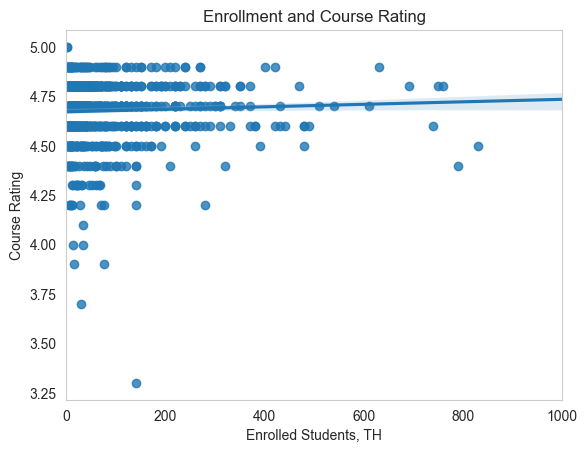

In [39]:
sns.regplot(data=df_courses, x='Course Students Enrolled TH', y='Course Rating');
plt.xlim(0, 1000)
plt.xlabel('Enrolled Students, TH')
plt.ylabel('Course Rating')
plt.title('Enrollment and Course Rating');

At a first glance, it seems that enrollment does not correlate much with the course rating - the rating deviates very much among the sub-200 TH courses, where the majority of courses are situated. Let's calculate the correlation coefficients including and excluding the outliers.

In [40]:
# Correlation Matrix (incl. outliers)
corr_matrix = df_courses[['Course Rating', 'Course Students Enrolled TH']].corr()
np.fill_diagonal(corr_matrix.values, np.nan)
enrollment_rating = corr_matrix['Course Rating'].dropna().values

# Correlation Matrix (excl. outliers above 1M students)
df_courses_ex_otl = df_courses[df_courses['Course Students Enrolled TH'] <= 1000]
corr_matrix_ex_otl = df_courses_ex_otl[['Course Rating', 'Course Students Enrolled TH']].corr()
np.fill_diagonal(corr_matrix_ex_otl.values, np.nan)
enrollment_rating_ex_otl = corr_matrix_ex_otl['Course Rating'].dropna().values

print(f"Course enrollment and course ratings have a correlation of {enrollment_rating[0]:.4f} for all courses.")
print(f"Course enrollment and course ratings have a correlation of {enrollment_rating_ex_otl[0]:.4f} for courses under 1M students.")

Course enrollment and course ratings have a correlation of 0.0711 for all courses.
Course enrollment and course ratings have a correlation of 0.0199 for courses under 1M students.


Excluding the courses with more than 1M students, we have an even smaller correlation coefficient than before. With that in mind, it is safe to conclude that enrollment numbers are not related to the course rating, and better leads are found looking at the course information.

**QUESTION**: Is there a significant difference in course ratings across various offerings?

**ANSWER**: Throughout the course offerings, all courses have a relatively high average rating.
*Course* certificate programs have the most consistent ratings throughout all difficulty levels, although *Professional Certificate* programs are more consistent in terms of rating range.
Besides the few outliers in other difficulty levels, *Advanced* courses have the largest deviations in rating.
With regards to enrollment and course rating, no significant correlation exists between the two variables.

# Conclusion

## Findings
Before conducting analysis, we have identified four areas of interest in the form of questions to help us develop a blueprint of a "perfect course". Let's go through each area again to summarize the findings and provide recommendations.

### Course Organizations
We observed that a very large part of courses (**69% of total**) were published by **Higher Education** institutions, namely **Universities**. The same case is visible within the Top 10 most popular courses - **9 out of 10 top courses were published by Universities**.

### Course Certifications
We identified three course certification categories: *Specialization*, *Course* and *Professional Certification*. The first two categories are prominent within both Higher Education institutions and Businesses, while **Professional Certificate courses are mostly published by Businesses**.

There is a notable difference in both mean and interquartile range when comparing enrollment rates by course certificate types. In most cases, **Professional Certificate courses have more than double average enrollment** compared to *Specialization* and *Course* certification counterparts; Additionally, they are very few in number. Nontheless, the Top 10 courses within the Coursera platform are all either *Course* or *Specialization* certification programs. 

### Course Difficulty
The courses were classified under four difficulty categories: *Beginner*, *Mixed*, *Intermediate* and *Advanced*. *Beginner* courses were the most frequent in the platform, however, the Top 10 was shared by both *Mixed* and *Beginner* difficulty courses, with the former taking the top 2 positions.

In terms of enrollment distribution, *Mixed* difficulty courses have a much better 25th percentile value than other categories. In terms of average enrollment, **Mixed and Beginner courses share the highest average enrollment rates** through the interquartile range metric. 

### Course Rating
Most courses are highly rated, with the mean rating and the 25th percentile being above **4.60**. A more detailed analysis of Certificate Type and Course Difficulty combinations showed that **Course certification programs have a consistently high rating among all difficulty levels**. *Specialization* courses are the opposite, with the lowest ratings throughout all difficulty categories.

Course Enrollment and Course Rating did not seem to correlate; This indicates that learners might look beyond the course rating when deciding to enroll within a course.

## Recommendations
Based on the analysis results, there are two recommended approaches for choosing and negotiating with our business client:
1. **University Mixed difficulty Course certification approach**
Universities are the biggest course publishers within the Coursera platform, both in terms of course frequency and course popularity. A safe approach would be to leverage their experience in the Online Learning industry and collaborate with them. As for the course itself, a combination of *Course* certification and *Mixed* difficulty seems to be the most successful combination both in terms of course rating and average enrollment. Additionally, this combination is prevalent within all *Course* certification courses within the Top 10!

In [41]:
top_10_courses[['Course Title', 'Course Organization', 'Course Certificate Type', 'Course Difficulty']]

,Course Title,Course Organization,Course Certificate Type,Course Difficulty
564,Machine Learning,Stanford University,COURSE,Mixed
815,The Science of Well-Being,Yale University,COURSE,Mixed
688,Python for Everybody,University of Michigan,SPECIALIZATION,Beginner
674,Programming for Everybody (Getting Started wit...,University of Michigan,COURSE,Mixed
196,Data Science,Johns Hopkins University,SPECIALIZATION,Beginner
129,Career Success,"University of California, Irvine",SPECIALIZATION,Beginner
261,English for Career Development,University of Pennsylvania,COURSE,Mixed
765,Successful Negotiation: Essential Strategies a...,University of Michigan,COURSE,Mixed
199,Data Science: Foundations using R,Johns Hopkins University,SPECIALIZATION,Beginner
211,Deep Learning,deeplearning.ai,SPECIALIZATION,Intermediate


2. **Business Professional Certificate approach**
The second approach leverages on the idea of an untapped market within the Online Learning industry - courses providing Professional Certificates. These courses are few in number and are mostly published by businesses, but show a very promising average enrollment rate that is more than double than other certification programs. The ratings for these courses are also relatively stable, with beginner-level professional certification courses having the highest mean rating of all combinations. With a proper in-demand skill and a solid business, a well-developed professional certification course might put businesses in the Online Learning scene and better prepare learners with job-ready skills. 

## Considerations and Improvements for Future Studies
The dataset has provided many valuable insights of what makes a popular course and which course and organization combinations might help replicate the success. Nonetheless, the following points should be considered:
1. The Publish date of the dataset (3 years ago)
2. Entirety of the data (Were any of the courses omitted by accident?)
3. Possible differences within other EdTech platforms with regards to organizations (Some platforms might collaborate more with businesses, than with Higher Education institutions)

Furthermore, the following data variables would help enhance the findings of future studies:
1. Course Rating on Course Finish
2. Course Graduation Rate
3. Course Certification Purchase Rate
4. Course Category (e.g., Computer Science, Psychology)